In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Lets try to predict if a student might have a learning disability.

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.dropna(subset=["Parental_Education_Level"], inplace=True)
df.dropna(subset=["Distance_from_Home"], inplace=True)
df.dropna(subset=["Teacher_Quality"], inplace=True)


In [7]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## Correlation Matrix of numerical features

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data visualized per count

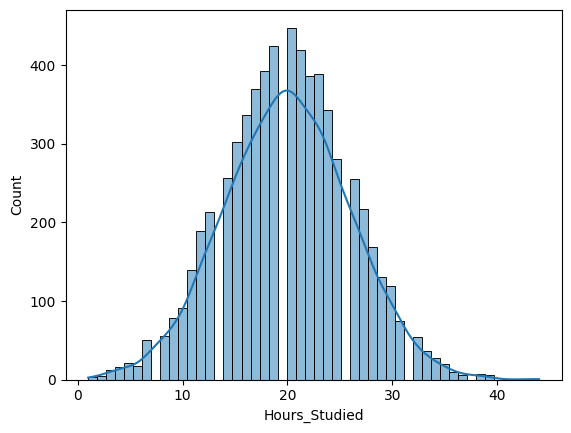

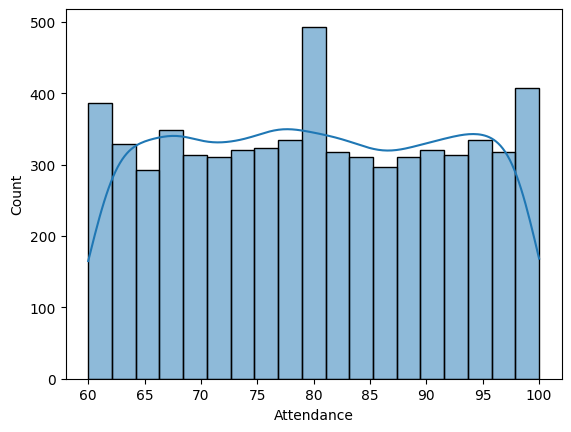

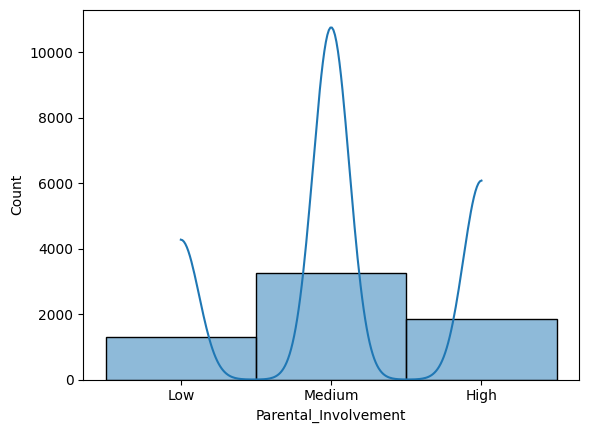

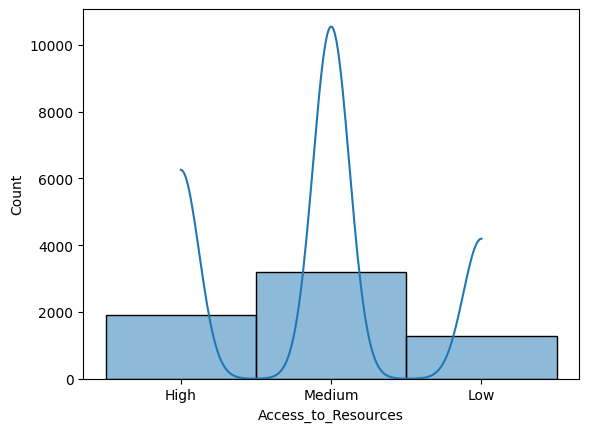

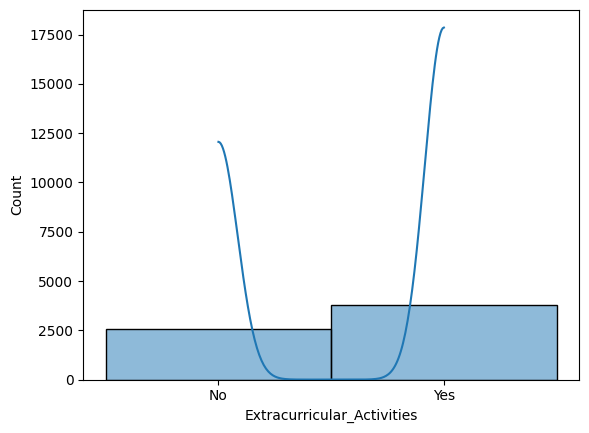

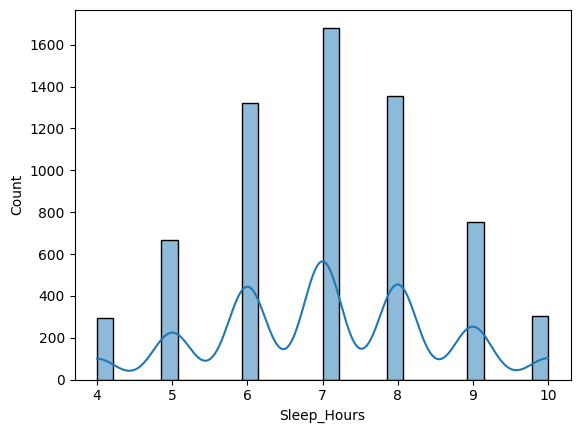

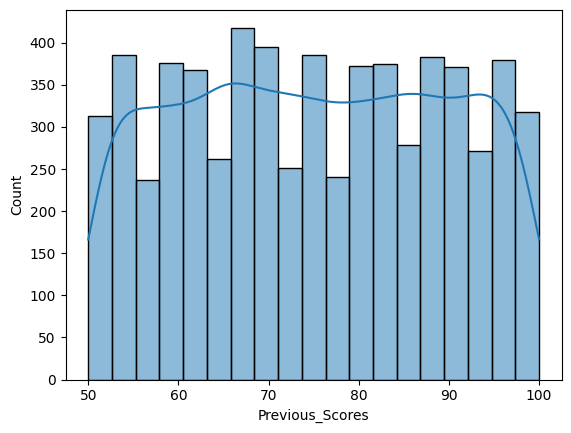

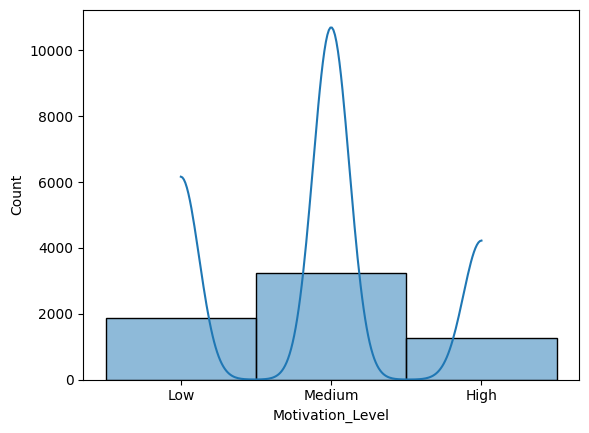

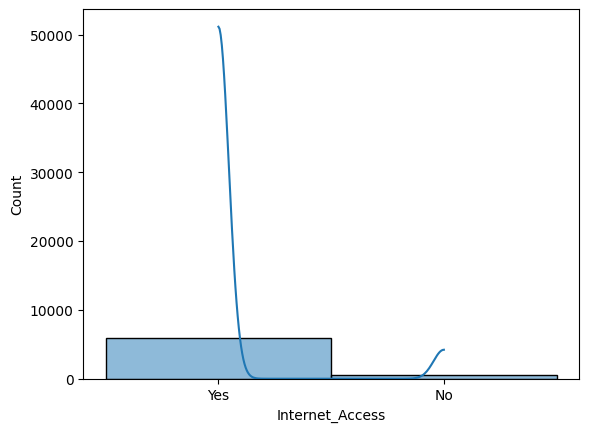

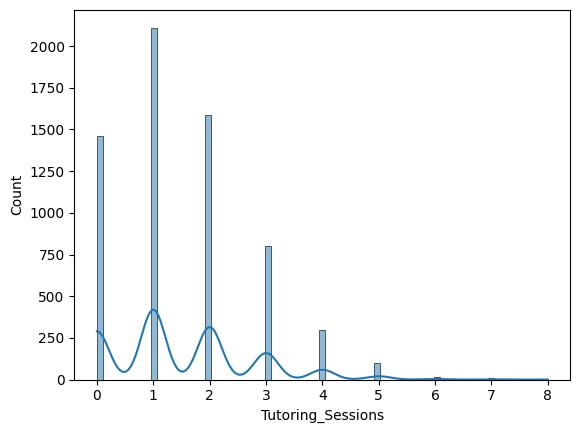

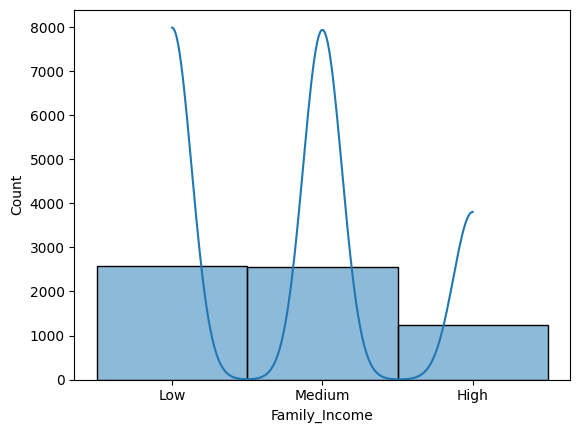

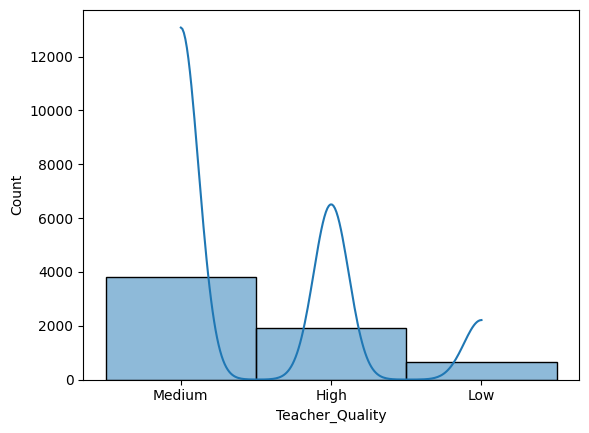

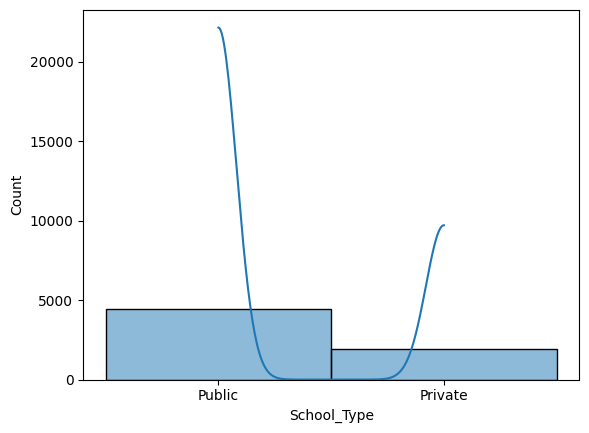

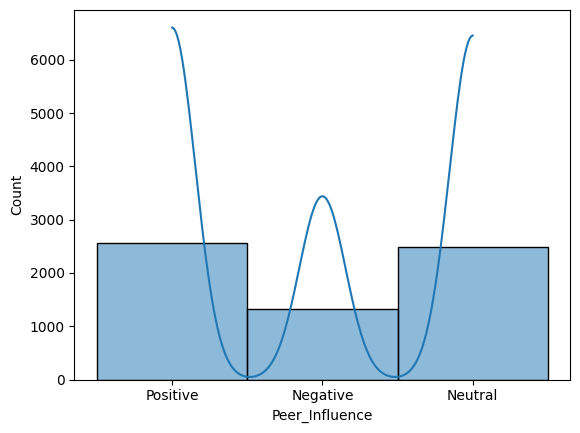

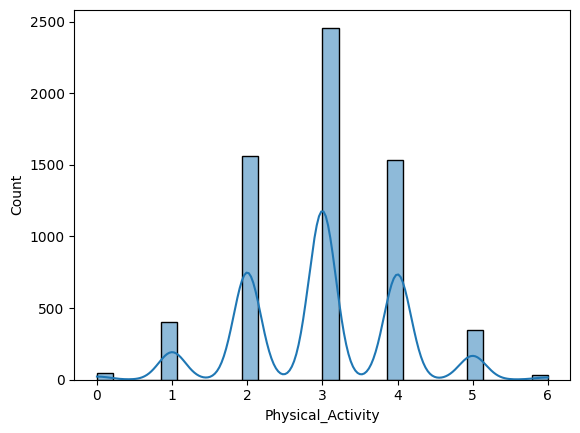

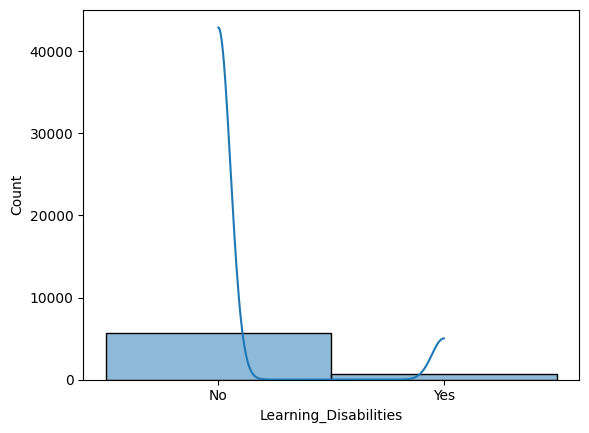

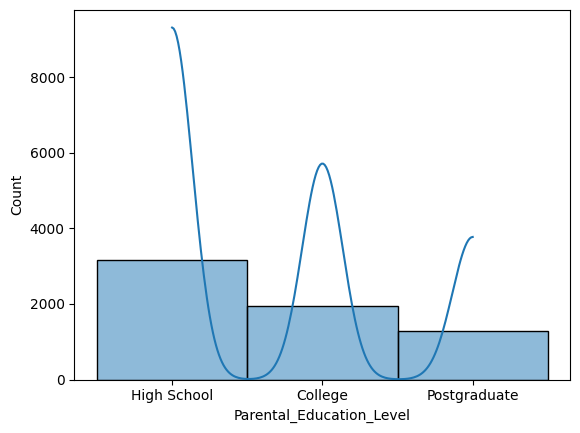

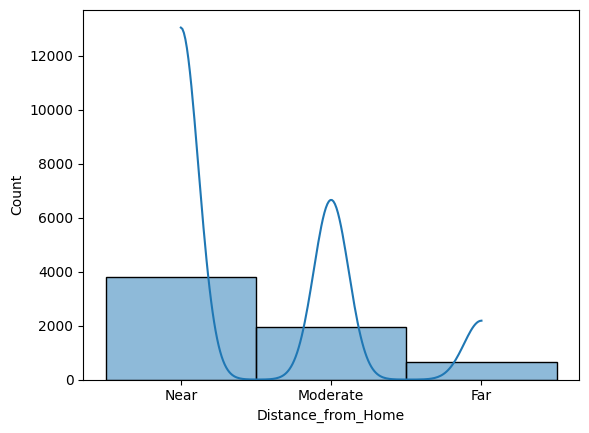

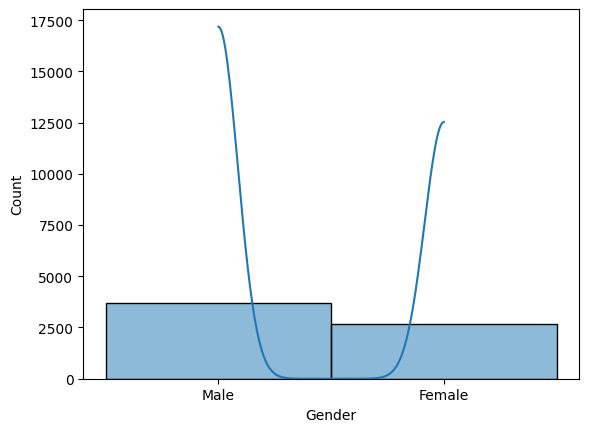

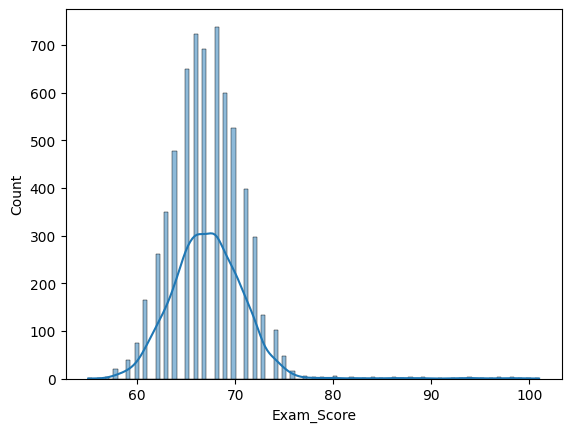

In [9]:
for col in df:
    if df[col].dtype != '0':
        sns.histplot(df[col], kde=True, stat='count')
        plt.show()

## Before cleaning data

In [10]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Clean Data

In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
ordinal_columns = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Parental_Education_Level',  # High School < College < Postgraduate
]

nominal_columns = [
    'Extracurricular_Activities',  # Yes, No
    'Internet_Access',             # Yes, No
    'School_Type',                 # Public, Private
    'Peer_Influence',              # Positive, Neutral, Negative
    'Gender'                       # Male, Female
]
# Removing outliers from dataset based on the Z-score method
df = df.drop(['Distance_from_Home'], axis=1)

df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)
df['Learning_Disabilities'] = df['Learning_Disabilities'].replace({'Yes': 1, 'No': 0})

label_encoder = LabelEncoder()
for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

/var/folders/ln/pbd4th9d3418040jtsw9xsmm0000gn/T/ipykernel_44402/3994578413.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Learning_Disabilities'] = df['Learning_Disabilities'].replace({'Yes': 1, 'No': 0})


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,3,0,1,67,False,True,True,False,True,True
1,19,64,1,2,8,59,1,2,2,2,4,0,0,61,False,True,True,False,False,False
2,24,98,2,2,7,91,2,2,2,2,4,0,2,74,True,True,True,True,False,True
3,29,89,1,2,8,98,2,1,2,2,4,0,1,71,True,True,True,False,False,True
4,19,92,2,2,6,65,2,3,2,0,4,0,0,70,True,True,True,True,False,False


In [13]:
df.shape

(6378, 20)

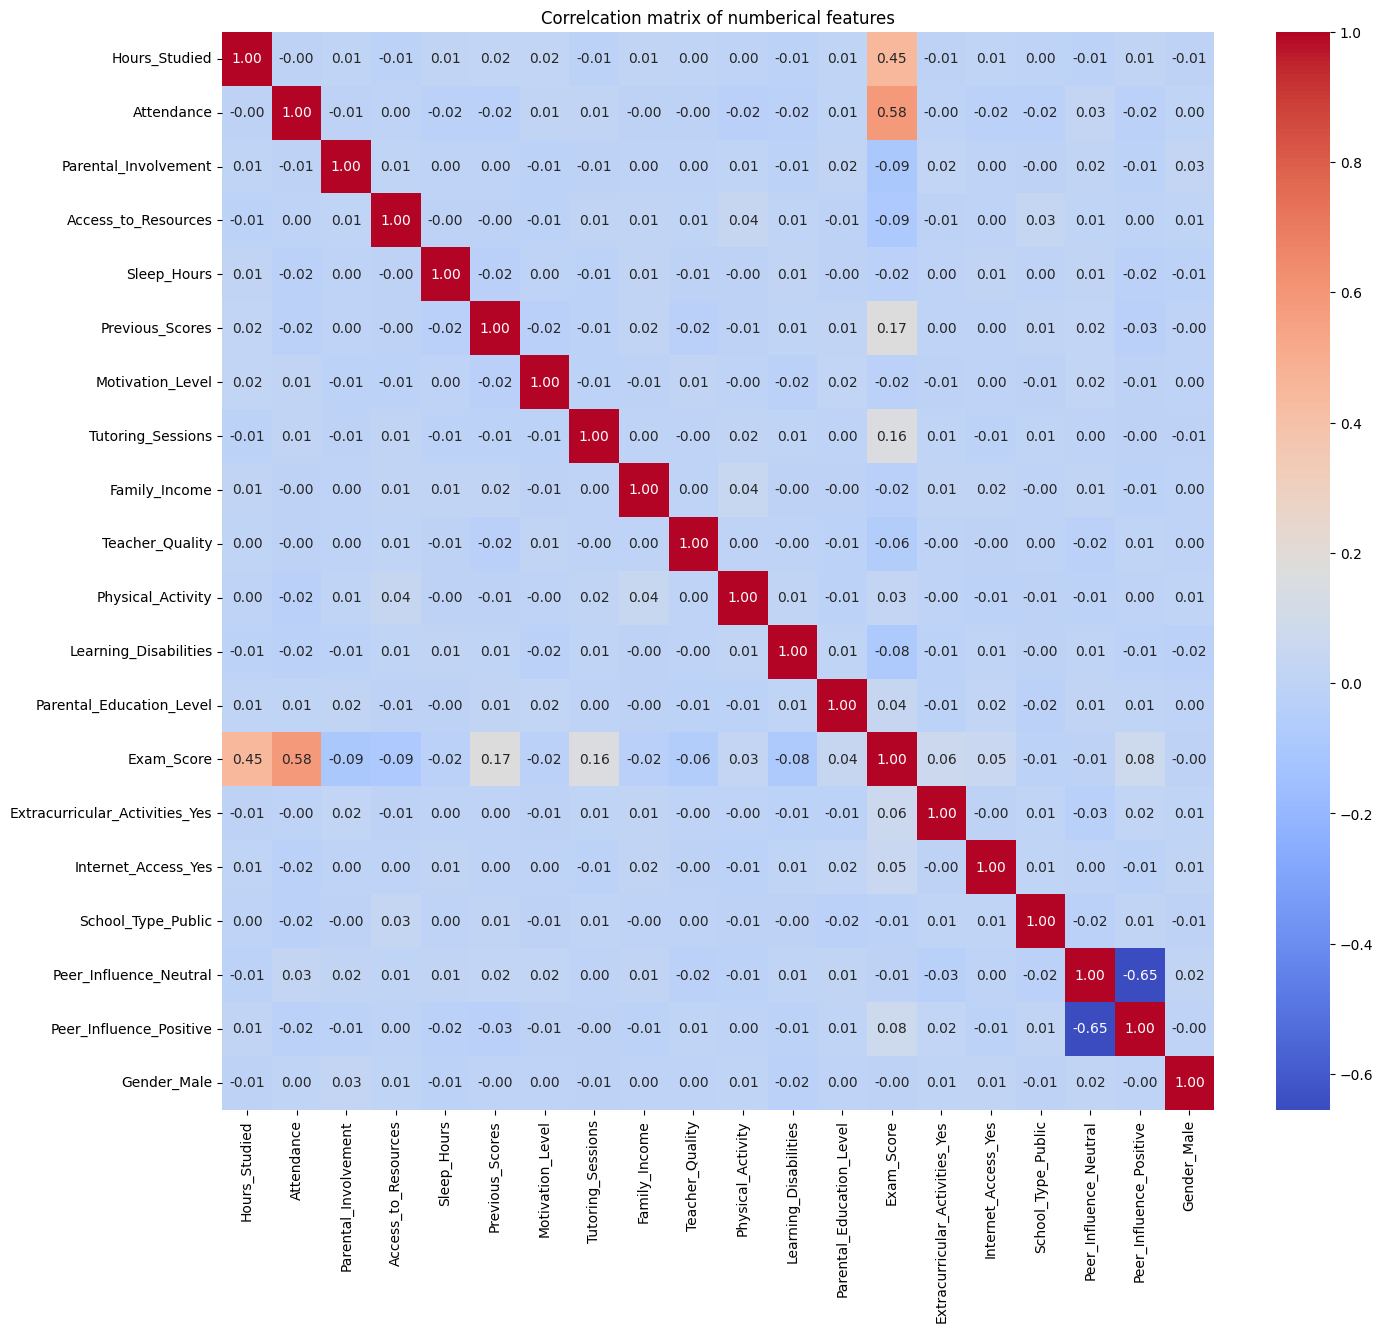

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlcation matrix of numberical features")
plt.show()

In [15]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

In [16]:
df.drop(columns=['Gender_Male','Teacher_Quality','Family_Income','Physical_Activity','Extracurricular_Activities_Yes','Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Sleep_Hours', 'Peer_Influence_Neutral', 'School_Type_Public', 'Internet_Access_Yes'])

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Learning_Disabilities,Parental_Education_Level,Exam_Score,Peer_Influence_Positive
0,23,84,73,0,0,1,67,True
1,19,64,59,2,0,0,61,False
2,24,98,91,2,0,2,74,False
3,29,89,98,1,0,1,71,False
4,19,92,65,3,0,0,70,False
...,...,...,...,...,...,...,...,...
6602,25,69,76,1,0,1,68,True
6603,23,76,81,3,0,1,69,True
6604,20,90,65,3,0,2,68,False
6605,10,86,91,2,0,1,68,True


## Remove outliers in Exam_score
#### Z-Score measures how many standard deviations a data point is from the mean

In [17]:
X = df.drop("Learning_Disabilities", axis=1)
y = df["Learning_Disabilities"]

In [18]:
X.shape

(5802, 19)

In [19]:
y.shape

(5802,)

## Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_regression_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8925904652498564


## Decision Tree Classifier With Bagging Classifier

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base = DecisionTreeClassifier(
    # keep trees fairly deep; bagging will tame variance
    max_depth=None, random_state=None
)

bag = BaggingClassifier(
    estimator=base,
    n_estimators=200,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=True,
    n_jobs=1,
    random_state=42
)

bag.fit(X_train, y_train)

print("OOB score:", bag.oob_score_)
print("Test acc:", accuracy_score(y_test, bag.predict(X_test)))

OOB score: 0.8944193061840121
Test acc: 0.8914728682170543


## Random Forest With ensable

In [22]:
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")

rf.fit(X_train, y_train)

print("Test acc:", accuracy_score(y_test, rf.predict(X_test)))

Test acc: 0.8931955211024979
